In [1]:
import pyucalgarysrs
import datetime

In [2]:
srs = pyucalgarysrs.PyUCalgarySRS()
start_dt = datetime.datetime(2020, 3, 21, 6, 30, 0)
end_dt = datetime.datetime(2020, 3, 21, 6, 35, 59)

In [3]:
res = srs.data.download("REGO_RAW", start_dt, end_dt, site_uid="gill")

In [4]:
data = srs.data.read(res.dataset, res.filenames, n_parallel=2)

In [5]:
data.data

array([[[301, 292, 299, ..., 317, 290, 309],
        [282, 280, 288, ..., 305, 295, 285],
        [291, 315, 286, ..., 308, 300, 303],
        ...,
        [323, 324, 319, ..., 339, 313, 311],
        [330, 343, 331, ..., 312, 326, 314],
        [334, 334, 335, ..., 356, 340, 337]],

       [[266, 296, 295, ..., 307, 305, 307],
        [295, 272, 312, ..., 301, 302, 281],
        [293, 313, 287, ..., 309, 311, 296],
        ...,
        [331, 314, 340, ..., 312, 328, 322],
        [349, 329, 325, ..., 330, 318, 331],
        [332, 334, 330, ..., 331, 361, 350]],

       [[275, 295, 301, ..., 293, 285, 293],
        [293, 293, 293, ..., 295, 314, 293],
        [288, 297, 303, ..., 294, 285, 301],
        ...,
        [335, 327, 320, ..., 311, 328, 335],
        [322, 311, 337, ..., 320, 331, 332],
        [352, 343, 339, ..., 357, 320, 322]],

       ...,

       [[302, 310, 295, ..., 310, 302, 303],
        [306, 296, 297, ..., 308, 311, 297],
        [314, 289, 309, ..., 304, 312, 306

In [6]:
import numpy as np

scale_min = 300.0  # MUST be a float
scale_max = 1100.0  # MUST be a float

scale_diff = scale_max - scale_min
scale_ratio = 65535.0 / scale_diff
im_scaled = (data.data[:, :, :] - scale_min) * scale_ratio  # apply scale
im_scaled = im_scaled.clip(0, 65535) + 0.5  # limit to 0-65535 (the range of a 16-bit image)
im_scaled = im_scaled.astype(np.uint16)  # convert data type to 16-bit

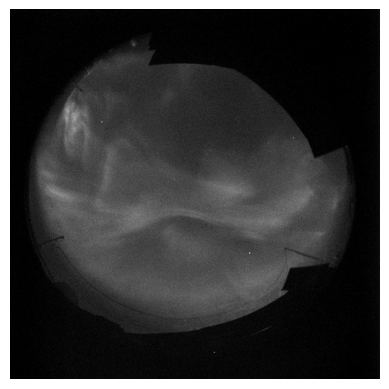

In [7]:
import matplotlib.pyplot as plt

plt.imshow(im_scaled[:, :, 0], origin="lower", cmap="gray")
plt.axis("off")
plt.show()

In [8]:
plt.style.use("dark_background")

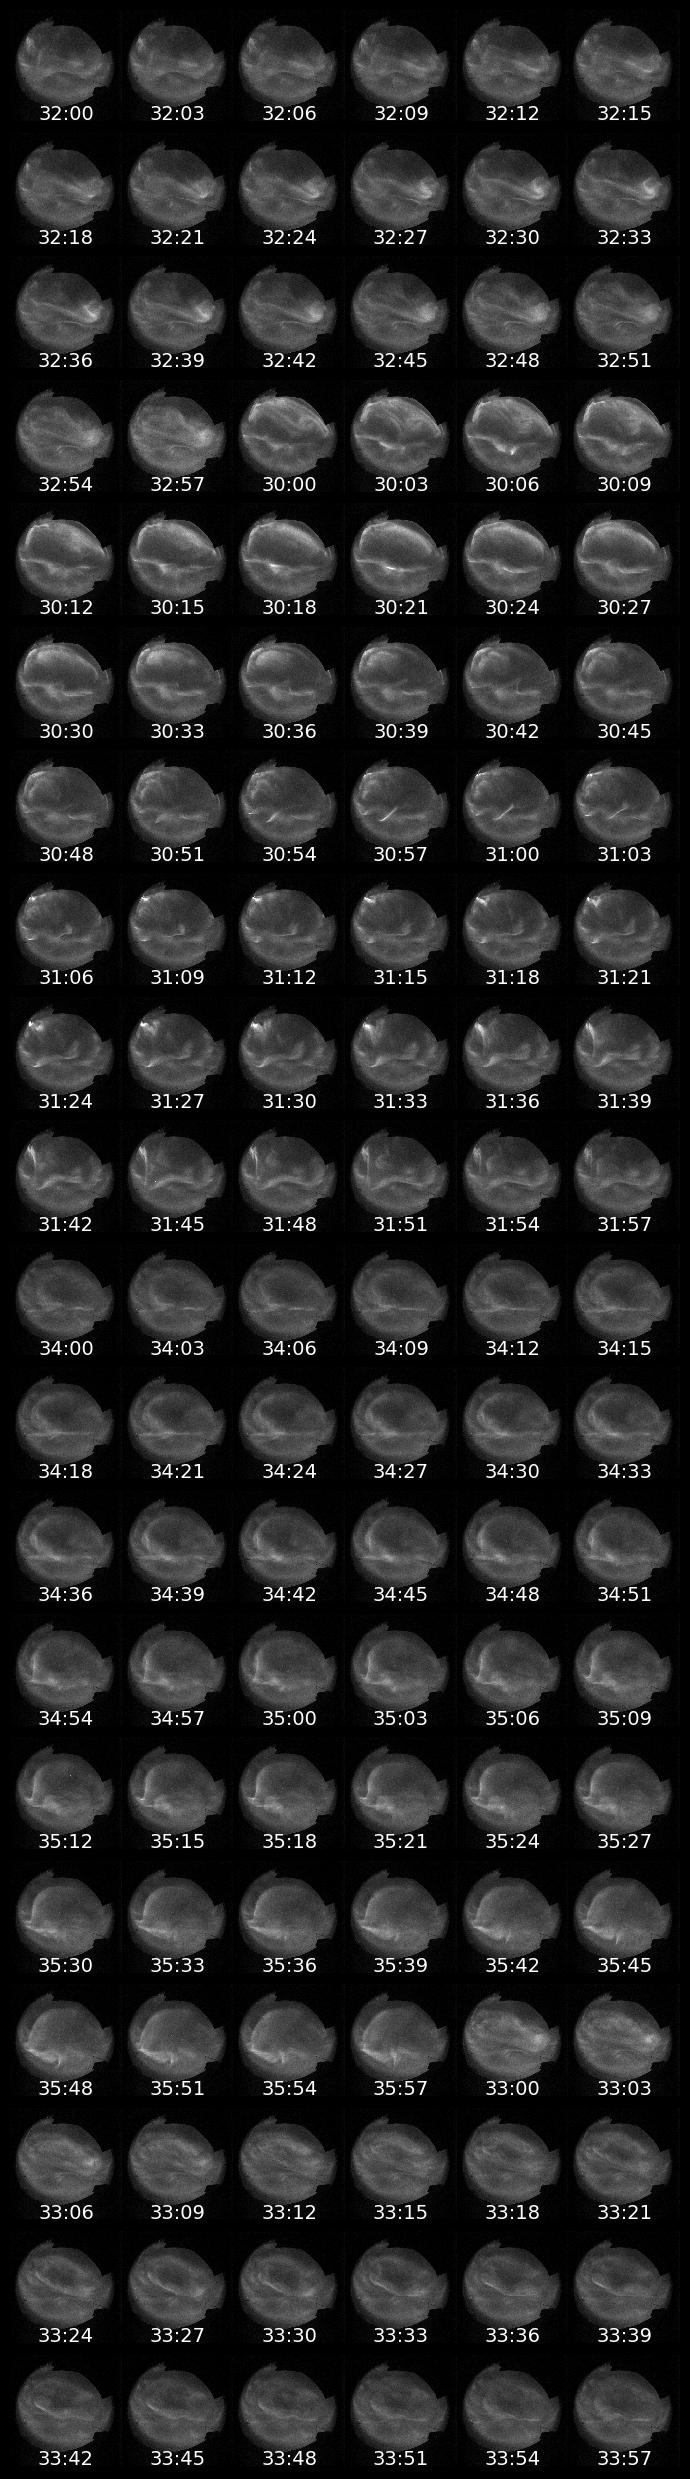

In [9]:
rows = 20
cols = 6
figsize = (7, 25)
timestamps_format = "%M:%S"
timestamps_fontsize = 14
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
for ax, i in zip(axs.flat, range(0, len(data.timestamp))):
    ax.imshow(im_scaled[:, :, i], cmap="grey", origin="lower", interpolation="nearest")
    ax.set_axis_off()

    # show timestamp
    ax.text(
        int(np.floor(im_scaled.shape[1] / 2.)),
        5,
        data.timestamp[i].strftime(timestamps_format),
        ha="center",
        fontsize=timestamps_fontsize,
    )
plt.tight_layout(h_pad=0, w_pad=0)